## Step 1: Import Library

In [1]:
from presentation import *
import numpy as np

## Step 2: Parameterize Image as a Closed-Loop Function

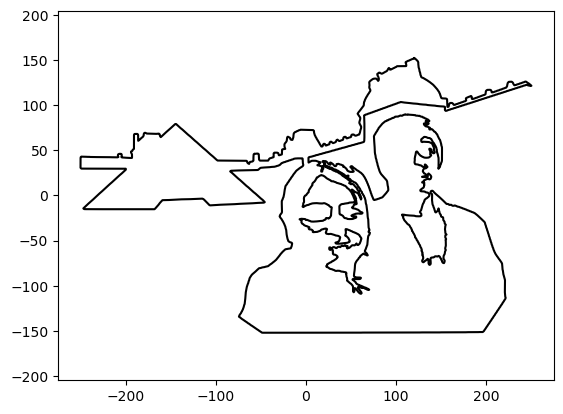

In [15]:
time_table, x_table, y_table = create_close_loop('katie_seb_louvre_process.jpg')
filename = 'brown_noise3.txt'
file = open(filename, 'a')
header_lines = "x," +'y'+ "\n"
file.write(header_lines)
for i in range(0, len(x_table)):
    complex_coef_number = f"{x_table[i]},{y_table[i]}\n"
    file.write(complex_coef_number)

## Step 3: Calculate Discrete Fourier Transform Coefficient

In [14]:
order = 10 # We need higher order approximation to get better approximation
coef = coef_list(time_table, x_table, y_table, order)
print(coef)
#this is a list of complex numbers, as the real part and the imaginary part
print(len(coef))
filename = 'brown_noise.txt'
file = open(filename, 'a')
header_lines = "a," +'b'+ "\n"
file.write(header_lines)
for coefs in coef:
    complex_coef_number = f"{coefs[0]},{coefs[1]}\n"
    file.write(complex_coef_number)
#coef_as_list = coef.tolist()
#coef_as_list.sort(key=sort_key)
#print('eat my shorts')
#coef_by_magnitude = np.array(coef_as_list)
##print(coef_by_magnitude)
#coef_to_process = []
#for coefficients in coef_by_magnitude:
#    coef_to_process.append([coefficients[0], coefficients[1]])
##print(coef_to_process)
#coef_to_transform = np.array(coef_to_process)
#print(coef_to_transform)

[[-6.94479649e+00 -2.13489464e+00]
 [-5.56497299e+00  3.53544454e+00]
 [-7.92000615e+00  1.08948541e+00]
 [ 1.99677876e+00 -1.20267685e+01]
 [-3.95942219e+00 -3.70533715e+00]
 [ 7.40663748e+00  5.98013382e+00]
 [ 1.06777519e+01 -4.58026196e-01]
 [ 4.18586789e+01 -1.07420733e+01]
 [ 2.83553846e+01 -9.47866055e+00]
 [-1.92754371e+01 -3.11291482e+00]
 [ 4.04666918e+01  5.49539762e+00]
 [-3.53750105e+01  5.92507124e+01]
 [ 5.77267668e+01  6.37469544e+01]
 [ 5.73643328e+00 -4.12140931e+00]
 [ 1.14200455e+01  1.24106613e+01]
 [ 1.20267013e+01  7.00902170e+00]
 [-1.67091754e+01 -1.44040077e+01]
 [-9.20237790e+00  2.01094446e+01]
 [ 8.06126859e+00  6.87570000e+00]
 [-6.95668407e+00 -4.90496929e-02]
 [-4.36915830e-01  1.48796635e+00]]
21


## Step 4: Evaluate Fourier Transform

In [16]:
space = determine_timesteps(len(coef)*2)
# space is the dt over the period, and wants to be the length of coefficient list
print(len(space))
x_DFT = []
y_DFT = []

for timestep in space:  
    dft = DFT(timestep, coef, order)
    x_DFT.append(dft[0]) # real part of transform
    y_DFT.append(dft[1]) # imaginary part of transform
print(len(x_DFT))
print(x_DFT)
print(y_DFT)


42
42
[113.38834021441173, 192.6043382164715, 222.72368382578946, 163.41651819604027, 72.0904984828628, 29.561193836667922, 39.5664162193775, 47.48305747839434, 29.382687228927168, 12.569488311682658, 20.608910060862293, 42.46355729223337, 56.835305729583794, 57.075239465226666, 49.99023513750167, 49.31121543225067, 68.18307874360109, 103.63478488049813, 133.91083554944777, 142.04935619201873, 133.51299261193614, 124.20470457361263, 126.41436476977076, 150.1583637775101, 191.18543725731018, 208.6116419820814, 152.29955844714817, 36.221956496733775, -52.76316027934824, -55.11598684233809, -16.730340182734597, -25.794471463015824, -99.02449054107898, -178.67086906839924, -219.39113267192192, -220.52225431015924, -185.1817585424021, -111.58928921765956, -27.73883343479254, 25.47207639953087, 56.72711194034152, 113.38834021441161]
[126.75778030736389, 120.5379449977907, 113.52363374359659, 106.58760900721599, 81.77852049889017, 40.49317672336552, 6.688495895774631, -5.477552587260793, -5.8

## Step 5: Visualize it

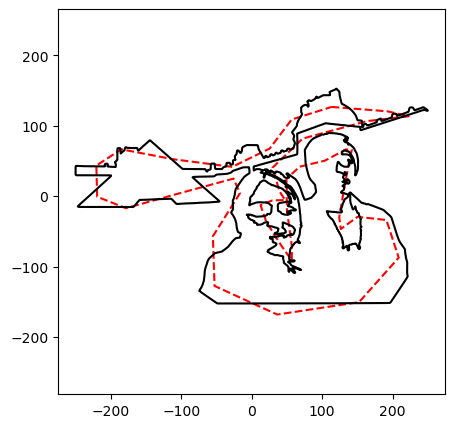

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_DFT, y_DFT, 'r--')
ax.plot(x_table, y_table, 'k-')
ax.set_aspect('equal', 'datalim')
xmin, xmax = xlim()
ymin, ymax = ylim()

## Step 6: Create Epicycle Animation

In [ ]:
anim = visualize(x_DFT, y_DFT, coef, order, space, [xmin, xmax, ymin, ymax])
Writer = animation.writers['html']
writer = Writer(fps=60)
anim.save('komodo.html',writer=writer, dpi=150)